In [13]:
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [14]:
inputs = tf.keras.Input(shape=(28,28,1)) 
x = tf.keras.layers.Conv2D(32, (3,3))(inputs)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(32, (3,3))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(64, (3,3))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10)(x)
x = tf.keras.layers.Activation('softmax')(x)

In [15]:
model = tf.keras.Model(inputs, x)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        1849

In [18]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [20]:
x_train = x_train[..., tf.newaxis].astype('float32')
x_test = x_test[..., tf.newaxis].astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test)

In [21]:
train_gen = ImageDataGenerator(rotation_range=15,
                               width_shift_range=0.2,
                               height_shift_range=0.1,
                               zoom_range=0.1)

In [22]:
training_set = train_gen.flow(x_train,y_train,batch_size=32)
test_set = train_gen.flow(x_test,y_test,batch_size=32)

In [23]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', # better than val_acc
                                               patience=3, 
                                               mode='auto', # default
                                               verbose=1)

In [24]:
history = model.fit(training_set,
                         steps_per_epoch=len(x_train) // 32, # 300
                         validation_data=test_set,
                         validation_steps=len(x_test) // 32, # 50
                         epochs=30,
                         callbacks=[es_callback])

Epoch 1/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5217 - accuracy: 0.8277 - val_loss: 0.0863 - val_accuracy: 0.9717
Epoch 2/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0932 - accuracy: 0.9730 - val_loss: 0.0522 - val_accuracy: 0.9833
Epoch 3/30
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0717 - accuracy: 0.9786 - val_loss: 0.0457 - val_accuracy: 0.9847
Epoch 4/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0558 - accuracy: 0.9831 - val_loss: 0.0483 - val_accuracy: 0.9842
Epoch 5/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0569 - accuracy: 0.9836 - val_loss: 0.0504 - val_accuracy: 0.9848
Epoch 6/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0372 - val_accuracy: 0.9890
Epoch 7/30
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0413 - accuracy: 0.9873 - val_loss: 0.0330 -

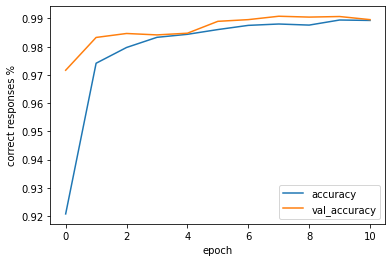

In [25]:
plt.plot(history.history['accuracy'],
         label='accuracy')
plt.plot(history.history['val_accuracy'],
         label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('correct responses %')
plt.legend()
plt.show()

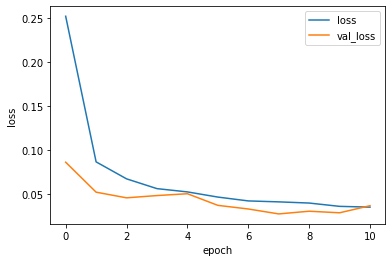

In [26]:
plt.plot(history.history['loss'],
         label='loss')
plt.plot(history.history['val_loss'],
         label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
model.save('es_func.h5')